In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline
color = sns.color_palette()


EDA For Customers file

In [ ]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [26]:
# specify encoding to deal with different formats
df = pd.read_csv("C:\\Users\\ankit\\Downloads\\Customers.csv")

In [28]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [30]:
# change the column names
df.rename(index=str, columns={'CustomerID': 'Customer_ID',
                              'CustomerName' : 'Customer_Name',
                              'Region' : 'Region',
                              'SignupDate' : 'Sign_up_Date'}, inplace=True)

In [32]:
df.head()

,Customer_ID,Customer_Name,Region,Sign_up_Date
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    200 non-null    object
 1   Customer_Name  200 non-null    object
 2   Region         200 non-null    object
 3   Sign_up_Date   200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB


Check missing values for each column

In [39]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)


Customer_ID      0
Customer_Name    0
Region           0
Sign_up_Date     0
dtype: int64

Exploratory Data Analysis (EDA)

How many orders made by the customers?

In [51]:
df.groupby(by=['Customer_ID','Region'], as_index=False)['Sign_up_Date'].count().head()

,Customer_ID,Region,Sign_up_Date
0,C0001,South America,1
1,C0002,Asia,1
2,C0003,South America,1
3,C0004,South America,1
4,C0005,Asia,1


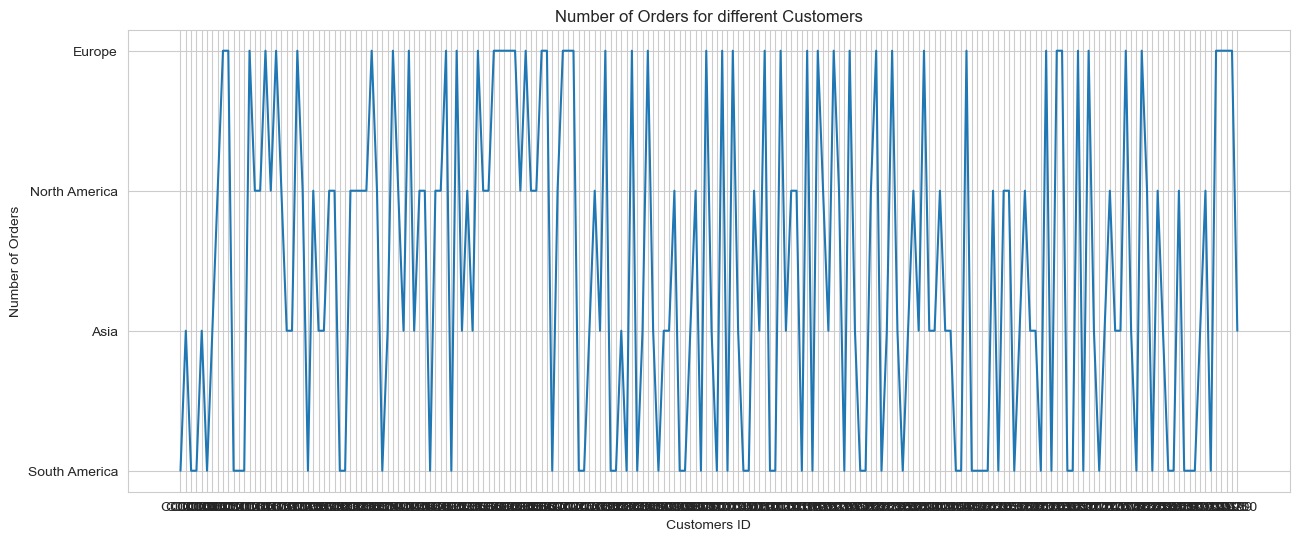

In [55]:
orders = df.groupby(by=['Customer_ID','Region'], as_index=False)['Sign_up_Date'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.Customer_ID, orders.Region)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

How many orders?

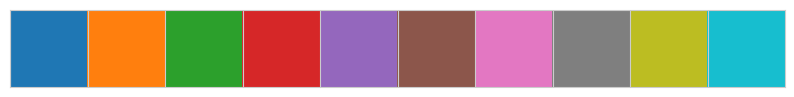

In [60]:
# color available
sns.palplot(color)

EDA For Product File

In [86]:
# specify encoding to deal with different formats
df = pd.read_csv("C:\\Users\\ankit\\Downloads\\Products.csv")

In [90]:
df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


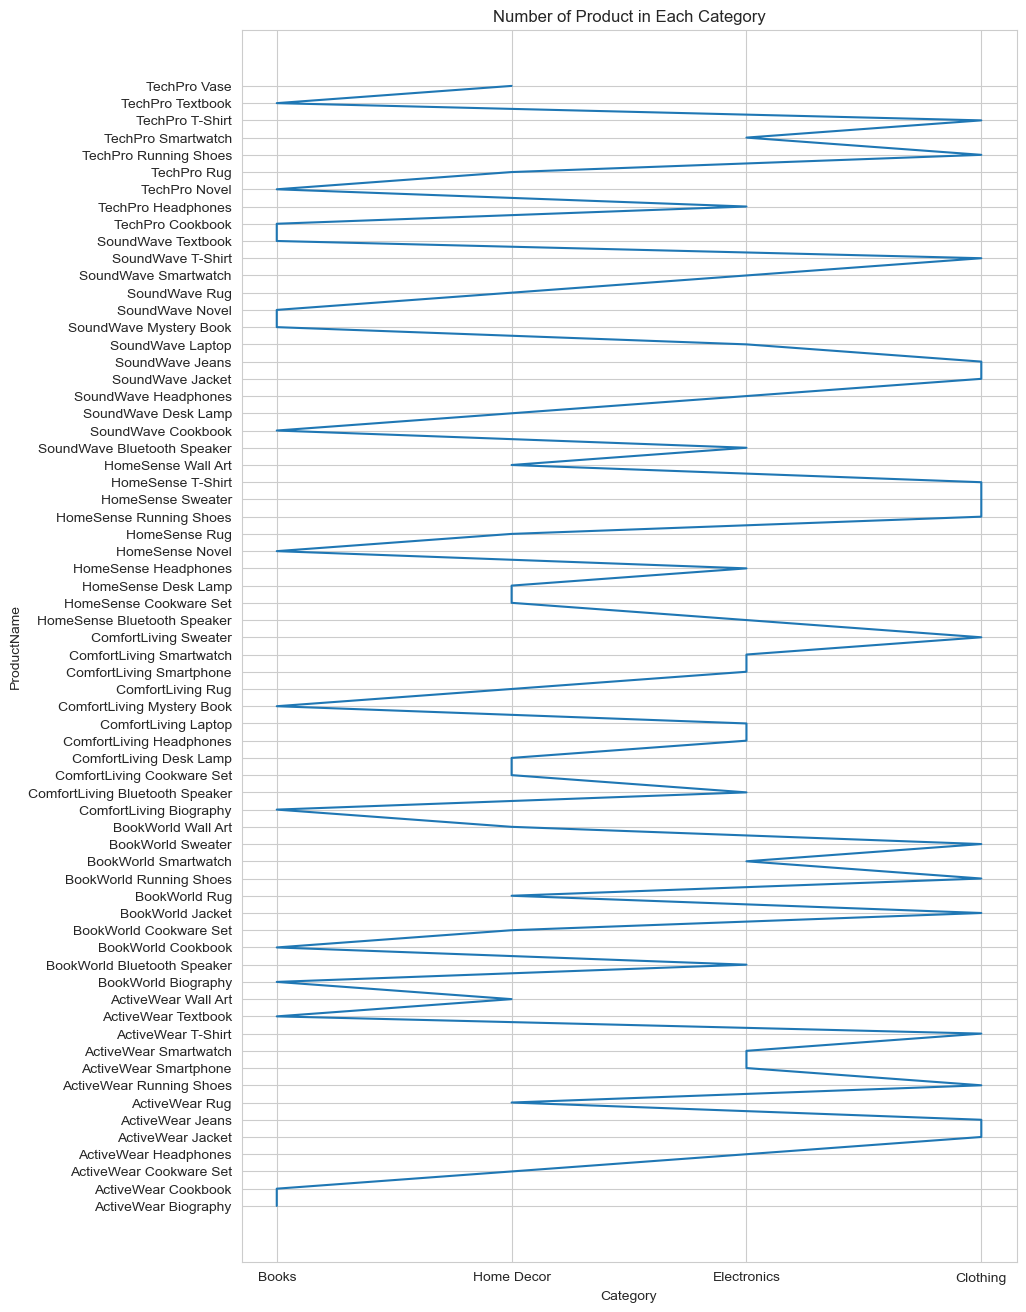

In [112]:
orders = df.groupby(by=['ProductName','Category'], as_index=False)['Price'].count()

plt.subplots(figsize=(10,16))
plt.plot(orders.Category, orders.ProductName)
plt.xlabel('Category')
plt.ylabel('ProductName')
plt.title('Number of Product in Each Category')
plt.show()

How many orders made by the customers?

In [115]:
df.groupby(by=['ProductName','Category'], as_index=False)['Price'].count().head()

,ProductName,Category,Price
0,ActiveWear Biography,Books,1
1,ActiveWear Cookbook,Books,1
2,ActiveWear Cookware Set,Home Decor,2
3,ActiveWear Headphones,Electronics,2
4,ActiveWear Jacket,Clothing,3


In [120]:
print('The TOP 5 Category with most number of orders...')
orders.sort_values(by='Price', ascending=False).head()

The TOP 5 Category with most number of orders...


,ProductName,Category,Price
47,SoundWave Headphones,Electronics,4
9,ActiveWear Smartwatch,Electronics,4
63,TechPro T-Shirt,Clothing,3
45,SoundWave Cookbook,Books,3
13,BookWorld Biography,Books,3


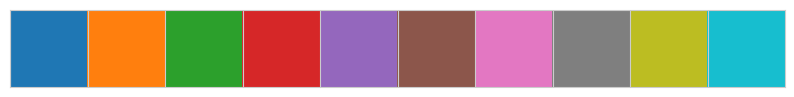

In [122]:
# color available
sns.palplot(color)

EDA For Transactions File

In [131]:
# specify encoding to deal with different formats
df = pd.read_csv("C:\\Users\\ankit\\Downloads\\Transactions.csv")

In [133]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [135]:
# change the column names
df.rename(index=str, columns={'TransactionID': 'Transaction_ID',
                              'CustomerID' : 'Customer_ID',
                              'ProductID' : 'Product_ID',
                              'Quantity' : 'Quantity',
                              'TransactionDate' : 'Transaction_date',
                              'TotalValue' : 'Total_Value',
                              'Price' : 'Price'}, inplace=True)

In [137]:
df.head()

,Transaction_ID,Customer_ID,Product_ID,Transaction_date,Quantity,Total_Value,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Data Cleaning

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1000 non-null   object 
 1   Customer_ID       1000 non-null   object 
 2   Product_ID        1000 non-null   object 
 3   Transaction_date  1000 non-null   object 
 4   Quantity          1000 non-null   int64  
 5   Total_Value       1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 62.5+ KB


Check Missing Values

In [143]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_date    0
Quantity            0
Total_Value         0
Price               0
dtype: int64

In [145]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,Transaction_ID,Customer_ID,Product_ID,Transaction_date,Quantity,Total_Value,Price


In [147]:
df.describe().round(2)

,Quantity,Total_Value,Price
count,1000.00,1000.00,1000.00
mean,2.54,690.00,272.55
std,1.12,493.14,140.74
min,1.00,16.08,16.08
25%,2.00,295.29,147.95
50%,3.00,588.88,299.93
75%,4.00,1011.66,404.40
max,4.00,1991.04,497.76


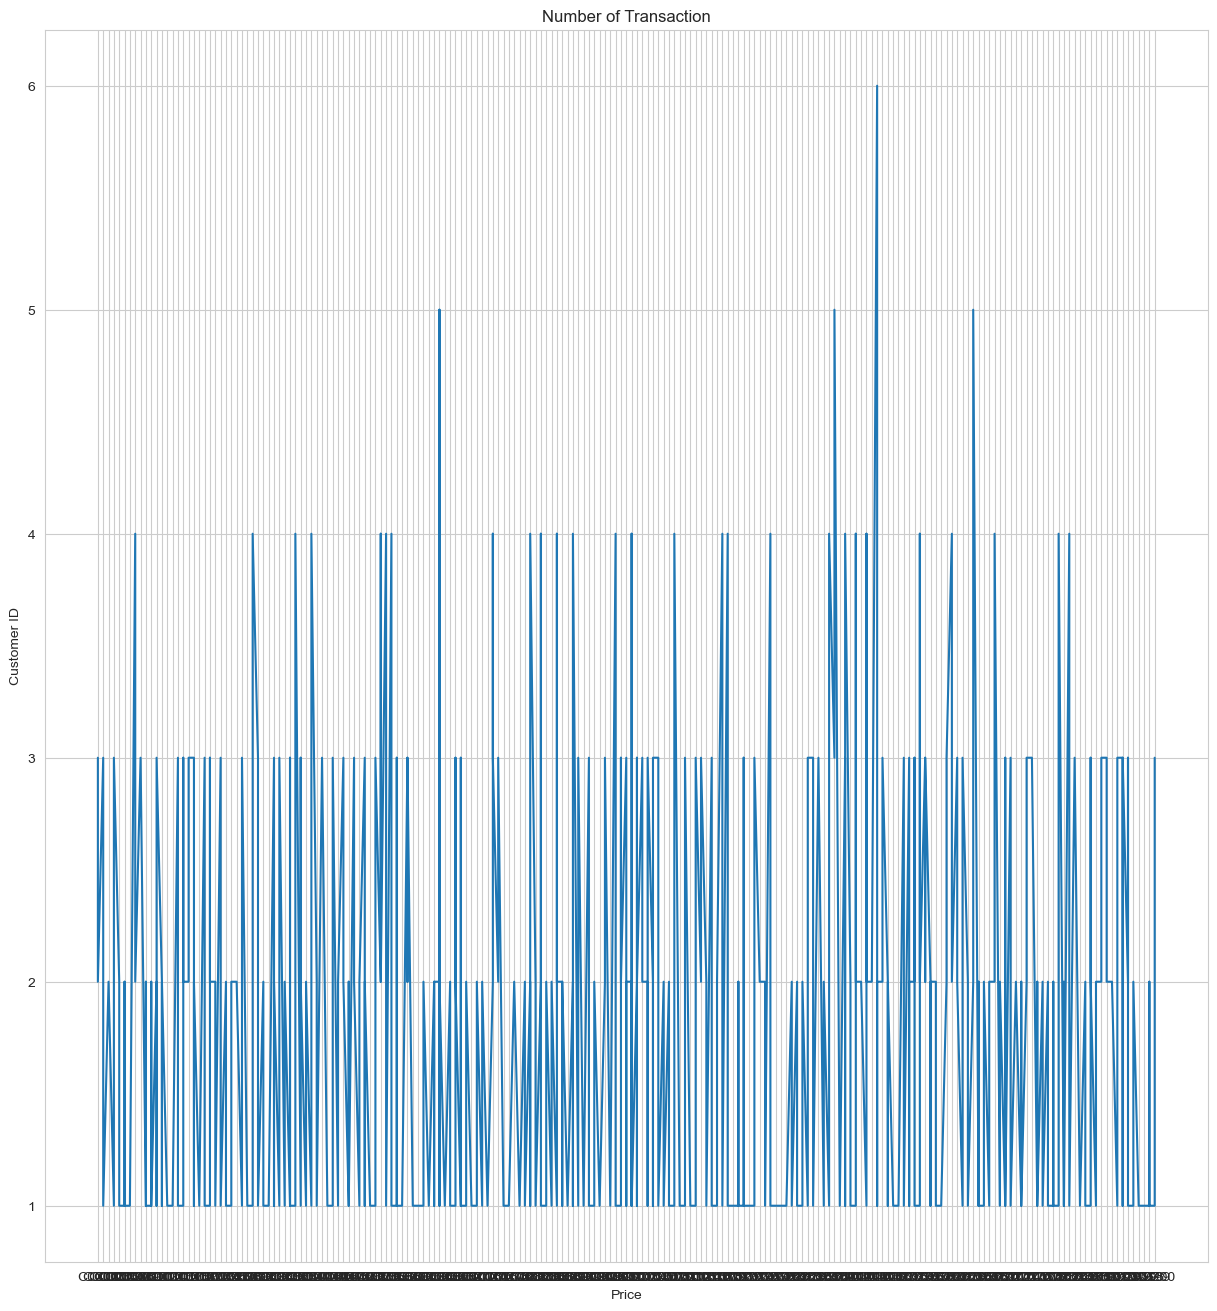

In [167]:
orders = df.groupby(by=['Customer_ID','Quantity'], as_index=False)['Price'].count()

plt.subplots(figsize=(15,16))
plt.plot(orders.Customer_ID, orders.Price)
plt.xlabel('Price')
plt.ylabel('Customer ID')
plt.title('Number of Transaction')
plt.show()

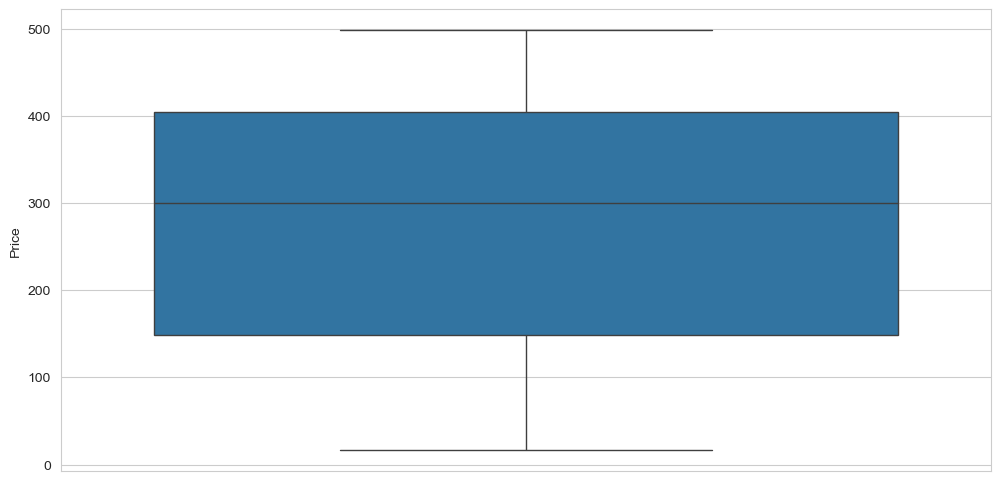

In [171]:
# check the distribution of price
plt.subplots(figsize=(12,6))
sns.boxplot(df.Price)
plt.show()

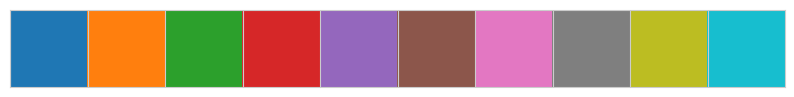

In [173]:
# color available
sns.palplot(color)